#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

In [65]:
import numpy as np

file = "../data/befkbhalderstatkode.csv"

data = np.genfromtxt(file, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

data

array([[2015,    1,    0, 5100,  614],
       [2015,    1,    0, 5104,    2],
       [2015,    1,    0, 5106,    1],
       ...,
       [1992,   99,   89, 5100,    1],
       [1992,   99,   90, 5180,    1],
       [1992,   99,   93, 5100,    1]], dtype=uint64)

In [84]:
mask = (data[:,0] == 2015) # filter only rows that has value = 1998 in column 0

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = data[mask & (data[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

all_per_neighb = np.array([number_of_people_per_neighbourhood(n, mask) for n in neighb.keys()])

for n in neighb:
    print(neighb[n]) 

Indre By
Østerbro
Nørrebro
Vesterbro/Kgs. Enghave
Valby
Vanløse
Brønshøj-Husum
Bispebjerg
Amager Øst
Amager Vest
Udenfor


<IPython.core.display.Javascript object>


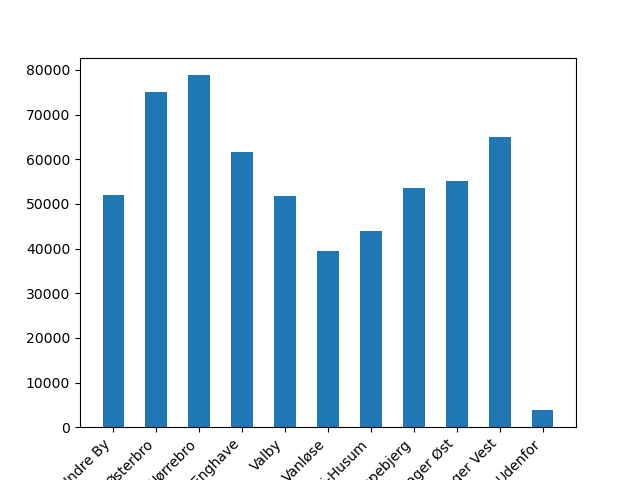

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [85]:
%matplotlib notebook
import matplotlib.pyplot as plt

city_names = ([])

for n in neighb:
    city_names.append(neighb[n])

city_names

plt.bar([name for name in city_names],[amount for amount in all_per_neighb],width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [80]:
mask = (data[:,0] == 2015) & (data[:,2] > 65)
print(np.sum(data[mask][:,4]))

55750


In [81]:
mask = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] != 5100)
print(np.sum(data[mask][:,4]))

3451


<IPython.core.display.Javascript object>


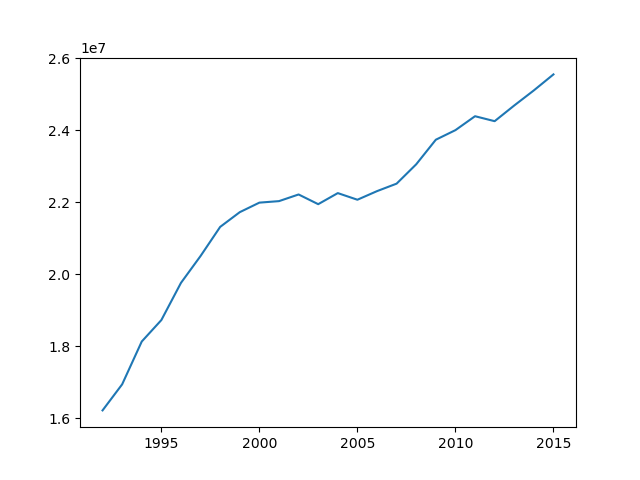

In [122]:
%matplotlib notebook
# %matplotlib notebook necessary to show the plot in ipython notebook (or use plt.show())
import matplotlib.pyplot as plt

østerbro_personer = []
for x in range(0, 24):
    mask = (data[:,0] == (1992 + x)) & (data[:,1] == 3)
    østerbro_personer.append(np.sum(data[mask]))


plt.plot([x for x in range(1992, 2016)], østerbro_personer)

<IPython.core.display.Javascript object>


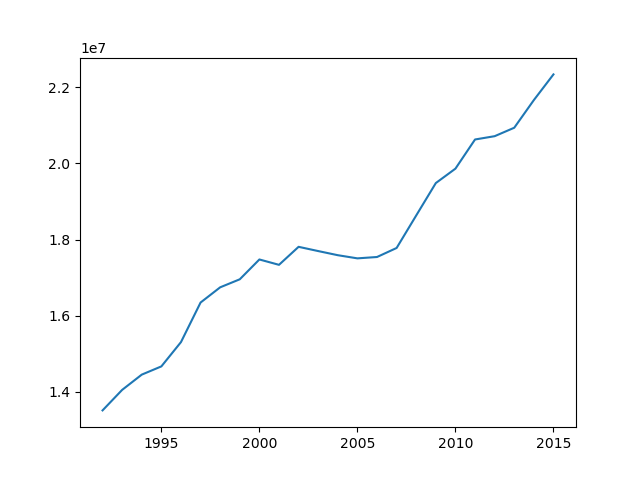

In [124]:
%matplotlib notebook
# %matplotlib notebook necessary to show the plot in ipython notebook (or use plt.show())
import matplotlib.pyplot as plt

vesterbro_personer = []
for x in range(0, 24):
    mask = (data[:,0] == (1992 + x)) & (data[:,1] == 4)
    vesterbro_personer.append(np.sum(data[mask]))


plt.plot([x for x in range(1992, 2016)], vesterbro_personer)